# Underlight Computation analog to 6SV

In [159]:
import numpy as np
import drjit as dr
import mitsuba as mi
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

mi.set_variant("llvm_ad_rgb")

In [160]:
wavelengths = np.arange(400, 705, 5)
att_coeff_k = np.array([
    0.0209, 0.0200, 0.0196, 0.0189, 0.0183,
    0.0182, 0.0171, 0.0170, 0.0168, 0.0166,
    0.0168, 0.0170, 0.0173, 0.0174, 0.0175,
    0.0184, 0.0194, 0.0203, 0.0217, 0.0240,
    0.0271, 0.0320, 0.0384, 0.0445, 0.0490,
    0.0505, 0.0518, 0.0543, 0.0568, 0.0615,
    0.0640, 0.0640, 0.0717, 0.0762, 0.0807,
    0.0940, 0.1070, 0.1280, 0.1570, 0.2000,
    0.2530, 0.2790, 0.2960, 0.3030, 0.3100,
    0.3150, 0.3200, 0.3250, 0.3300, 0.3400,
    0.3500, 0.3700, 0.4050, 0.4180, 0.4300,
    0.4400, 0.4500, 0.4700, 0.5000, 0.5500,
    0.6500
])
att_coeff_chi = np.array([
    0.1100, 0.1110, 0.1125, 0.1135, 0.1126,
    0.1104, 0.1078, 0.1065, 0.1041, 0.0996,
    0.0971, 0.0939, 0.0896, 0.0859, 0.0823,
    0.0788, 0.0746, 0.0726, 0.0690, 0.0660,
    0.0636, 0.0600, 0.0578, 0.0540, 0.0498,
    0.0475, 0.0467, 0.0450, 0.0440, 0.0426,
    0.0410, 0.0400, 0.0390, 0.0375, 0.0360,
    0.0340, 0.0330, 0.0328, 0.0325, 0.0330,
    0.0340, 0.0350, 0.0360, 0.0375, 0.0385,
    0.0400, 0.0420, 0.0430, 0.0440, 0.0445,
    0.0450, 0.0460, 0.0475, 0.0490, 0.0515,
    0.0520, 0.0505, 0.0440, 0.0390, 0.0340,
    0.0300
])
att_coeff_e = np.array([
    0.668, 0.672, 0.680, 0.687, 0.693,
    0.701, 0.707, 0.708, 0.707, 0.704,
    0.701, 0.699, 0.700, 0.703, 0.703,
    0.703, 0.703, 0.704, 0.702, 0.700,
    0.700, 0.695, 0.690, 0.685, 0.680,
    0.675, 0.670, 0.665, 0.660, 0.655,
    0.650, 0.645, 0.640, 0.630, 0.623,
    0.615, 0.610, 0.614, 0.618, 0.622,
    0.626, 0.630, 0.634, 0.638, 0.642,
    0.647, 0.653, 0.658, 0.663, 0.667,
    0.672, 0.677, 0.682, 0.687, 0.695,
    0.697, 0.693, 0.665, 0.640, 0.620,
    0.600
])

molecular_scatttering_coeff_6s = np.array([
    0.0076, 0.0072, 0.0068, 0.0064, 0.0061,
    0.0058, 0.0055, 0.0052, 0.0049, 0.0047,
    0.0045, 0.0043, 0.0041, 0.0039, 0.0037,
    0.0036, 0.0034, 0.0033, 0.0031, 0.0030,
    0.0029, 0.0027, 0.0026, 0.0025, 0.0024,
    0.0023, 0.0022, 0.0022, 0.0021, 0.0020,
    0.0019, 0.0018, 0.0018, 0.0017, 0.0017,
    0.0016, 0.0016, 0.0015, 0.0015, 0.0014,
    0.0014, 0.0013, 0.0013, 0.0012, 0.0012,
    0.0011, 0.0011, 0.0010, 0.0010, 0.0010,
    0.0010, 0.0009, 0.0008, 0.0008, 0.0008,
    0.0007, 0.0007, 0.0007, 0.0007, 0.0007,
    0.0007
])

molecular_scatttering_coeff_morel = np.array([
    0.00618095, 0.00578095,
    0.00547619, 0.00517619, 0.00492222, 0.0046746 , 0.00447143,
    0.00426825, 0.00406508, 0.0038619 , 0.00365873, 0.00346667,
    0.00331429, 0.0031619 , 0.00300952, 0.00287143, 0.00276984,
    0.00265238, 0.0025    , 0.00236508, 0.00226349, 0.0021619 ,
    0.00206032, 0.00195873, 0.00185714, 0.00177778, 0.00172698,
    0.00167619, 0.0016254 , 0.0015746 , 0.00152381, 0.00144603,
    0.00134444, 0.0013    , 0.0013    , 0.00126984, 0.00121905,
    0.00116825, 0.00111746, 0.00107   , 0.00102429, 0.00098556,
    0.00095   , 0.0009181 , 0.00088762, 0.00085714, 0.00082667,
    0.00079619, 0.00076571, 0.00073937, 0.00071397, 0.00069286,
    0.00067254, 0.00065222, 0.0006319 , 0.00061159, 0.00059127,
    0.00057095, 0.00055063, 0.00053524, 0.00052
])

In [161]:
def salinity(chlorinity):
    return 0.03 + 1.805 * chlorinity

def friedman_sverdrup(chlorinity):
    return 0.00017492711 * salinity(chlorinity)

def fresnel(nr, ni, coschi, sinchi):
    s = nr * nr - ni * ni - sinchi * sinchi
    a1 = np.abs(s)
    a2 = np.sqrt(s ** 2 + 4 * nr * nr * ni * ni)
    u = np.sqrt(0.5 * np.abs(a1 + a2))
    v = np.sqrt(0.5 * np.abs(a2 - a1))
    Rr2 = ((coschi - u) ** 2 + v * v) / ((coschi + u) ** 2 + v * v)
    b1 = (nr * nr - ni * ni) * coschi
    b2 = 2 * nr * ni * coschi
    Rl2 = ((b1 - u) ** 2 + (b2 + v) ** 2) / ((b1 + u) ** 2 + (b2 - v) ** 2)
    R = (Rr2 + Rl2) / 2
    return R

def cox_munk(phw, zx, zy, wspd):
    sigmaC = 0.003 + 0.00192 * wspd
    sigmaU = 0.00316 * wspd
    C21 = 0.01 - 0.0086 * wspd
    C03 = 0.04 - 0.033 * wspd
    C40 = 0.40
    C22 = 0.12
    C04 = 0.23
    xe = (np.round(np.cos(phw), 8) * zx + np.round(np.sin(phw), 8) * zy) / np.sqrt(sigmaC)
    xn = (-np.round(np.sin(phw), 8) * zx + np.round(np.cos(phw), 8) * zy) / np.sqrt(sigmaU)
    xe2 = xe * xe
    xn2 = xn * xn
    coef = 1.0 - C21 / 2.0 * (xe2 - 1.0) * xn - C03 / 6.0 * (xn2 - 3) * xn
    coef = coef + C40 / 24.0 * (xe2 * xe2 - 6.0 * xe2 + 3.0)
    coef = coef + C04 / 24.0 * (xn2 * xn2 - 6.0 * xn2 + 3.0)
    coef = coef + C22 / 4.0 * (xe2 - 1.0) * (xn2 - 1.0)
    prob = coef / (2.0 * np.pi * np.sqrt(sigmaU) * np.sqrt(sigmaC)) * np.exp(-(xe2 + xn2) / 2.0)
    return prob

def sunglint(to, ti, po, pi, pu, wspd, nr, ni, chlor):
    phi = pi - po
    phw = pi - pu
    cs = round(np.cos(ti), 8)
    cv = round(np.cos(np.pi / 2 - to), 8)
    ss = round(np.sin(ti), 8)
    sv = round(np.sin(np.pi / 2 - to), 8)
    zx = -sv * round(np.sin(phi), 8) / (cs + cv)
    zy = (ss + sv * round(np.cos(phi), 8)) / (cs + cv)

    # Tilt
    tan_tilt = np.sqrt(zx * zx + zy * zy)
    tilt = np.arctan(tan_tilt)

    # Cox Munk term
    specular_prob = cox_munk(phw, zx, zy, wspd)
    if specular_prob < 0:
        specular_prob = 0
    
    # Fresnel term
    cos2chi = cv * cs + sv * ss * round(np.cos(phi), 8)
    
    if cos2chi > 1.0:
        cos2chi = 0.999999999
    elif cos2chi < -1.0:
        cos2chi = -0.999999999
    coschi = np.sqrt(0.5 * (1.0 + cos2chi))
    sinchi = np.sqrt(0.5 * (1.0 - cos2chi))
    if coschi > 1.0:
        coschi = 0.999999999
    elif coschi < -1.0:
        coschi = -0.999999999
    if sinchi > 1.0:
        sinchi = 0.999999999
    elif sinchi < -1.0:
        sinchi = -0.999999999

    nr_corr = nr + friedman_sverdrup(chlor)
    R = fresnel(nr_corr, ni, coschi, sinchi)
    
    # Reflectance of sun glint
    return specular_prob, R, tilt, cs, cv

# Wavelength in namometers
def backscatter_ratio(pigmentation, wavelength):
    return 2e-3 + 2e-2 * (0.5 - 0.25 * np.log(pigmentation)) * (550.0 / wavelength)

def scattering_coefficient(pigmentation):
    return 0.30 * np.power(pigmentation, 0.62);

def backscattering_coefficient(pigmentation, wavelength, morel=False):
    molecular_scatter_coeff = 0.0
    if morel:
        molecular_scatter_coeff = np.interp(wavelength, wavelengths, molecular_scatttering_coeff_morel)
    else:
        molecular_scatter_coeff = np.interp(wavelength, wavelengths, molecular_scatttering_coeff_6s)
    scattering_coeff = scattering_coefficient(pigmentation)
    backscatter_rat = backscatter_ratio(pigmentation, wavelength)
    return 0.5 * molecular_scatter_coeff + scattering_coeff * backscatter_rat

def diffuse_attenuation_coefficient(wavelength, pigmentation):
    # Interpolate wavelength for k, chi and e
    k = np.interp(wavelength, wavelengths, att_coeff_k)
    chi = np.interp(wavelength, wavelengths, att_coeff_chi)
    e = np.interp(wavelength, wavelengths, att_coeff_e)
    return k + chi * np.power(pigmentation, e)

def up_down_ratio(wavelenght, pigmentation, morel=False):
    backscatter_coeff = backscattering_coefficient(pigmentation, wavelenght, morel=morel)
    diffuse_attenuation_coeff = diffuse_attenuation_coefficient(wavelenght, pigmentation)
    u = 0.75
    r_omega = 0.33 * backscatter_coeff / (u * diffuse_attenuation_coeff)

    def stop_criterion(current, previous):
        return np.abs((current - previous) / current) < 1e-3
    
    while True:
        # Update U
        u = (0.9 * (1.0 - r_omega)) / (1.0 + 2.25 * r_omega)

        # Update R
        r_omega_prev = r_omega
        r_omega = 0.33 * backscatter_coeff / (u * diffuse_attenuation_coeff)
        if stop_criterion(r_omega, r_omega_prev):
            break

    return r_omega

def downwelling_transmittance(ti, pi, pu, wspd, nr, ni, chlor):
    # Downwelling transmittance
    o_d = 0.0
    pi = np.pi

    # 24 x 48 point Gauss quadrature
    zenith_pts, zenith_weights = np.polynomial.legendre.leggauss(24)    # Zenith
    azimuth_pts, azimuth_weights = np.polynomial.legendre.leggauss(48)  # Azimuth

    # Transformation of the azimuth: x = π(t + 1)       [-1, 1] => [0, 2π]
    # Transform of the zenith: x = (π / 4)(t + 1)       [-1, 1] => [0, π/2]
    transformed_zeniths = 0.5 * (zenith_pts * (2 * pi) + 2 * pi)
    transformed_azimuths = 0.5 * (azimuth_pts * (pi / 2) + pi / 2)

    # Create 2D points
    p_x, p_y = np.meshgrid(transformed_zeniths, transformed_azimuths, indexing='ij')
    points = np.vstack([p_x.ravel(), p_y.ravel()]).T

    # Create weights (and don't forget the Jacobian)
    w_x, w_y = np.meshgrid(zenith_weights, azimuth_weights, indexing='ij')
    weights = (w_x * w_y).ravel() * ((pi * 2) / 0.5) * ((pi / 2) / 2)

    # The function to integrate
    def f(to, po):
        cos_to = round(np.cos(to), 8)
        sin_to = round(np.sin(to), 8)

        spec, R, tilt, alpha, beta = sunglint(to, ti, po, pi, pu, wspd, nr, ni, chlor)
        reflectance = (pi * spec * R) / (4.0 * alpha * beta * np.cos(tilt) ** 4)
        return reflectance * cos_to * sin_to
    
    # Evaluate the integral using the quadrature points and weights
    values = np.array([f(*p) for p in points])
    o_d = np.dot(values, weights)

    # Transmittance = 1 - opacity
    return 1 - o_d

def upwelling_transmittance(to, po, pu, wspd, nr, ni, chlor):
    # Upwelling transmittance
    o_u = 0.0
    pi = np.pi

    # 24 x 48 point Gauss quadrature
    zenith_pts, zenith_weights = np.polynomial.legendre.leggauss(24)    # Zenith
    azimuth_pts, azimuth_weights = np.polynomial.legendre.leggauss(48)  # Azimuth

    # Transformation of the azimuth: x = π(t + 1)       [-1, 1] => [0, 2π]
    # Transform of the zenith: x = (π / 4)(t + 1)       [-1, 1] => [0, π/2]
    transformed_zeniths = 0.5 * (zenith_pts * (2 * pi) + 2 * pi)
    transformed_azimuths = 0.5 * (azimuth_pts * (pi / 2) + pi / 2)

    # Create 2D points
    p_x, p_y = np.meshgrid(transformed_zeniths, transformed_azimuths, indexing='ij')
    points = np.vstack([p_x.ravel(), p_y.ravel()]).T

    # Create weights (and don't forget the Jacobian)
    w_x, w_y = np.meshgrid(zenith_weights, azimuth_weights, indexing='ij')
    weights = (w_x * w_y).ravel() * ((pi * 2) / 0.5) * ((pi / 2) / 2)

    # The function to integrate
    def f(ti, pi):
        cos_ti = round(np.cos(ti), 8)
        sin_ti = round(np.sin(ti), 8)

        spec, R, tilt, alpha, beta = sunglint(to, ti, po, pi, pu, wspd, nr, ni, chlor)
        reflectance = (pi * spec * R) / (4.0 * alpha * beta * np.cos(tilt) ** 4)
        return spec
    
    # Evaluate the integral using the quadrature points and weights
    values = np.array([f(*p) for p in points])
    o_u = np.dot(values, weights)

    condition = values < 0
    if np.any(condition):
        # Print the negative value
        print(np.min(values))

    # Transmittance = 1 - opacity
    return 1 - o_u

def underlight(to, ti, po, pi, pu, wspd, n_real, n_imag, wavelength, pigmentation, chlorinity):
    # According to Vermote & Kotchenova
    if (wavelength < 400 or wavelength > 700):
        return 0.0

    alpha = 0.485
    r_omega = up_down_ratio(wavelength, pigmentation, chlorinity)

    t_d = downwelling_transmittance(ti, pi, pu, wspd, n_real, n_imag, chlorinity)
    t_u = upwelling_transmittance(to, po, pu, wspd, n_real, n_imag, chlorinity)

    # Return the underlight
    return (1.0 / (n_real**2 + n_imag**2)) * (r_omega * t_d * t_u) / (1.0 - alpha * r_omega)


In [162]:
# Some parameters for the test case
#   Sun angle
azim_s = 0.0

#   Wind speed and direction
wind_speed = 10
azim_w = 0.0

#   Water properties (IOR and chlorinity)
n_real = 1.333
n_imag = 0.0
chlorinity = 19

#   Variable sensor position
res = 25
epsilon = 1.0 * np.pi / 180
azim_vs = np.linspace(0, 2 * np.pi, 2 * res)
zen_vs = np.linspace(0, np.pi / 2, res)
    

In [163]:
# Test upwelling transmittance
azimuth = 0.0
zeniths = np.linspace(0, np.pi / 2, 91)

wind_speed = 10
wind_direction = 0.0

n_real = 1.333
n_imag = 0.0

chlorinity = 19

results = {}
for zenith in zeniths:
    t_u = upwelling_transmittance(zenith, azimuth, wind_direction, wind_speed, n_real, n_imag, chlorinity)
    results[zenith] = t_u


/var/folders/2y/rhmx4lpx7yj6c8p50ldw1x_c0000gp/T/ipykernel_51133/1406200445.py:193: RuntimeWarning: divide by zero encountered in scalar divide
  reflectance = (pi * spec * R) / (4.0 * alpha * beta * np.cos(tilt) ** 4)
/var/folders/2y/rhmx4lpx7yj6c8p50ldw1x_c0000gp/T/ipykernel_51133/1406200445.py:193: RuntimeWarning: invalid value encountered in scalar divide
  reflectance = (pi * spec * R) / (4.0 * alpha * beta * np.cos(tilt) ** 4)


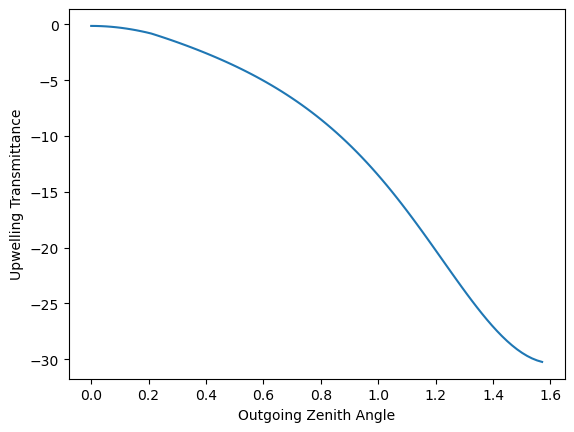

In [164]:
# Visualize the upwelling transmittance
fig, ax = plt.subplots()
ax.plot(zeniths, results.values())

ax.set_xlabel("Outgoing Zenith Angle")
ax.set_ylabel("Upwelling Transmittance")

plt.show()